In [ ]:
import pandas as pd
from google.colab import drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Crypto_Features_with_Trends.csv'

df = pd.read_csv(file_path)
display(df.head())

,datetime,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume BTC,ETH_Open,ETH_High,ETH_Low,ETH_Close,...,SOL_High_Low_Range,SOL_Range_STD_24h,SOL_Volatility_Trend_7d,SOL_Returns_1h,SOL_Returns_24h,SOL_Cumulative_Return_3h,SOL_EMA_12,SOL_EMA_26,SOL_MACD,SOL_Return_Trend_7d
0,2023-10-19 23:00:00,28649.64,28717.82,28630.19,28713.71,613.28448,1564.22,1567.31,1563.70,1566.57,...,0.009674,NaN,NaN,NaN,NaN,NaN,24.930000,24.930000,0.000000,NaN
1,2023-10-19 22:00:00,28604.09,28704.99,28598.60,28649.65,767.85518,1563.45,1568.00,1563.39,1564.22,...,0.007649,NaN,NaN,-0.004813,NaN,NaN,24.865000,24.867692,-0.002692,NaN
2,2023-10-19 21:00:00,28715.39,28739.73,28604.09,28604.09,1118.51697,1566.51,1567.72,1563.39,1563.46,...,0.010359,NaN,NaN,0.001612,NaN,NaN,24.859145,24.861336,-0.002190,NaN
3,2023-10-19 20:00:00,28750.75,28882.07,28684.80,28715.38,1737.14711,1568.00,1573.15,1563.72,1566.51,...,0.011928,NaN,NaN,0.010060,NaN,0.006859,24.935174,24.928056,0.007118,NaN
4,2023-10-19 19:00:00,28646.98,28765.76,28645.00,28750.75,1039.20935,1561.66,1569.92,1561.20,1568.00,...,0.011178,NaN,NaN,0.002390,NaN,0.014063,24.996258,24.981845,0.014414,NaN


In [ ]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16674 entries, 0 to 16673
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   datetime                   16674 non-null  object 
 1   BTC_Open                   16674 non-null  float64
 2   BTC_High                   16674 non-null  float64
 3   BTC_Low                    16674 non-null  float64
 4   BTC_Close                  16674 non-null  float64
 5   BTC_Volume BTC             16674 non-null  float64
 6   ETH_Open                   16674 non-null  float64
 7   ETH_High                   16674 non-null  float64
 8   ETH_Low                    16674 non-null  float64
 9   ETH_Close                  16674 non-null  float64
 10  ETH_Volume ETH             16674 non-null  float64
 11  SOL_Open                   16674 non-null  float64
 12  SOL_High                   16674 non-null  float64
 13  SOL_Low                    16674 non-null  flo

In [ ]:
# Define feature groups
volume_feats = ['BTC_Volume_Change', 'BTC_Volume_MA_24h', 'SOL_Volume_Change', 'SOL_Volume_MA_24h']
volatility_feats = ['BTC_Volatility_Trend_7d', 'SOL_Volatility_3h', 'SOL_Volatility_Trend_7d']
sentiment_feats = ['Sentiment_Daily', 'Sentiment_5Day_Cumulative']
return_feats = ['BTC_Returns', 'SOL_Returns']

# === Interaction: Volume x Volatility
for v in volume_feats:
    for vol in volatility_feats:
        df[f'{v}_x_{vol}'] = df[v] * df[vol]

# === Interaction: Volume x Sentiment
for v in volume_feats:
    for s in sentiment_feats:
        df[f'{v}_x_{s}'] = df[v] * df[s]

# === Interaction: Volatility x Sentiment
for vol in volatility_feats:
    for s in sentiment_feats:
        df[f'{vol}_x_{s}'] = df[vol] * df[s]

# === Interaction: Returns x Volume
for r in return_feats:
    for v in volume_feats:
        df[f'{r}_x_{v}'] = df[r] * df[v]

# === Interaction: Returns x Sentiment
for r in return_feats:
    for s in sentiment_feats:
        df[f'{r}_x_{s}'] = df[r] * df[s]


In [ ]:
interaction_features = [col for col in df.columns if '_x_' in col]


In [ ]:
lookback = 120
HORIZON = 24
import numpy as np
# -----------------------------
features_to_lag = [
    "Sentiment_Daily", "BTC_Volatility_3h", "BTC_Volume_Change",
    "SOL_Volatility_3h", "SOL_Volume_Change"
]

for col in features_to_lag:
    for lag in range(1, HORIZON * 2):
        df[f"{col}_lag{lag}"] = df[col].shift(lag)

# -----------------------------
# 4. Create Interaction Features
# -----------------------------
df["BTC_MACD_x_Sentiment"] = df["BTC_MACD"] * df["Sentiment_Daily"]
df["BTC_Returns_x_Vol"] = df["BTC_Returns"] * df["BTC_Volatility_24h"]
df["SOL_Returns_x_Sentiment"] = df["SOL_Returns"] * df["Sentiment_Daily"]

df_model = df.dropna()
df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.dropna(inplace=True)


/tmp/ipython-input-1825063403.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df[col].shift(lag)
/tmp/ipython-input-1825063403.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag{lag}"] = df[col].shift(lag)
/tmp/ipython-input-1825063403.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

Epoch 1/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 74s 784ms/step - loss: 0.0965 - mae: 0.1817 - val_loss: 0.9109 - val_mae: 1.3249
Epoch 2/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 755ms/step - loss: 0.0483 - mae: 0.0713 - val_loss: 0.7058 - val_mae: 1.1051
Epoch 3/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 753ms/step - loss: 0.0374 - mae: 0.0629 - val_loss: 0.5449 - val_mae: 0.9390
Epoch 4/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 754ms/step - loss: 0.0302 - mae: 0.0526 - val_loss: 0.2659 - val_mae: 0.6290
Epoch 5/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 754ms/step - loss: 0.0255 - mae: 0.0497 - val_loss: 0.0476 - val_mae: 0.1854
Epoch 6/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 755ms/step - loss: 0.0219 - mae: 0.0471 - val_loss: 0.1098 - val_mae: 0.3728
Epoch 7/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 755ms/step - loss: 0.0190 - mae: 0.0443 - val_loss: 0.0367 - val_mae: 0.1656
Epoch 8/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 752ms/step - loss: 0.0165 - mae: 0.0426 - val_loss: 0.0324 - val_mae: 0.1452
Epoch 9/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 752ms/

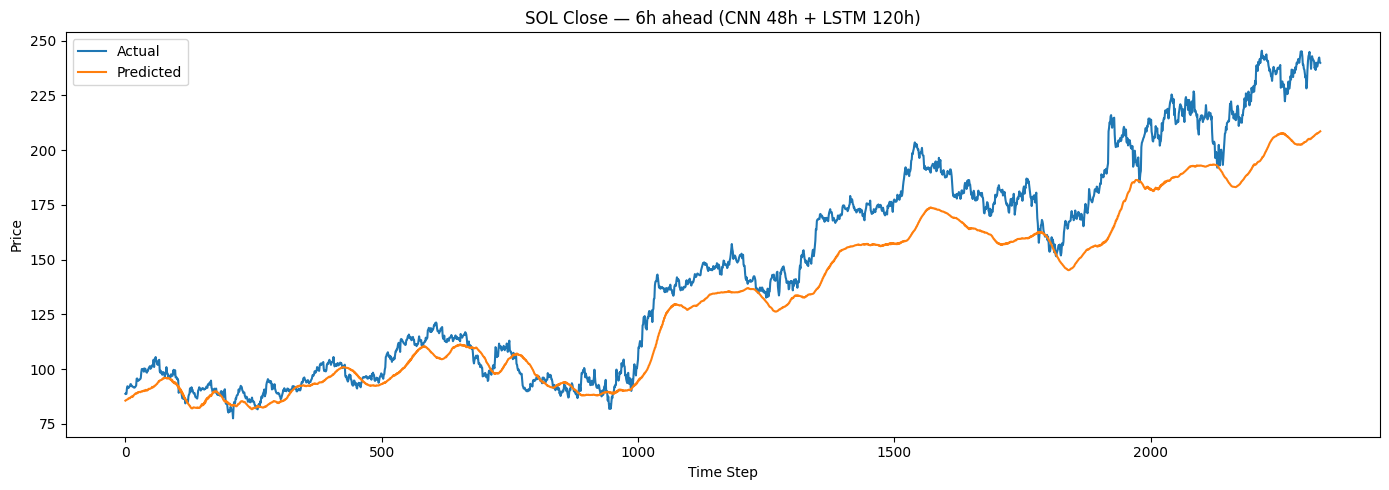

In [ ]:
# ============================
# Config
# ============================
SHORT_LOOKBACK = 48     # CNN branch
LONG_LOOKBACK  = 120    # LSTM branch
HORIZON        = 6      # hours ahead
TARGET_COL     = "SOL_Close"

# ============================
# Feature Lists
# ============================
selected_features = [
    # SOL
    'SOL_Volume_Change','SOL_Volume_MA_3h','SOL_Volume_MA_24h','SOL_Volume_Ratio',
    'SOL_Volume_STD_24h','SOL_Volume_Trend_7d','SOL_Returns','SOL_Volatility_3h',
    'SOL_Volatility_24h','SOL_High_Low_Range','SOL_Range_STD_24h','SOL_Volatility_Trend_7d',
    'SOL_Returns_1h','SOL_Returns_24h','SOL_Cumulative_Return_3h','SOL_EMA_12','SOL_EMA_26',
    'SOL_MACD','SOL_Return_Trend_7d','Sentiment_Daily','Sentiment_5Day_Cumulative','Sentiment_1Day_Lagged',
    # BTC
    'BTC_Volume_Change','BTC_Volume_MA_3h','BTC_Volume_MA_24h','BTC_Volume_Ratio',
    'BTC_Volume_STD_24h','BTC_Volume_Trend_7d','BTC_Returns','BTC_Volatility_3h',
    'BTC_Volatility_24h','BTC_High_Low_Range','BTC_Range_STD_24h','BTC_Volatility_Trend_7d',
    'BTC_Returns_1h','BTC_Returns_24h','BTC_Cumulative_Return_3h','BTC_EMA_12','BTC_EMA_26',
    'BTC_MACD','BTC_Return_Trend_7d',
]
lag_features = [c for c in df.columns if '_lag' in c]



# Use ALL features for BOTH branches
all_features = selected_features + interaction_features + lag_features
assert len(all_features) > 0, "No features found."

# ============================
# Helpers
# ============================
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def make_sequences(X, y, lookback):
    """Make (X_seq, y_seq) where label aligns to the end of each window."""
    Xs, ys = [], []
    n = len(X)
    for i in range(n - lookback + 1):
        Xs.append(X[i:i+lookback])
        ys.append(y[i+lookback-1])
    return np.asarray(Xs), np.asarray(ys)

def make_dual_sequences(X, y, short_lb, long_lb):
    """
    Build sequences for two different lookbacks and align them to the LONG lookback timeline.
    Returns: X_short_aligned, X_long, y_long
    """
    X_short, y_short = make_sequences(X, y, short_lb)
    X_long,  y_long  = make_sequences(X, y, long_lb)
    # Align: drop the first (long_lb - short_lb) samples from the short branch
    offset = long_lb - short_lb
    if offset < 0:
        raise ValueError("LONG_LOOKBACK must be >= SHORT_LOOKBACK.")
    X_short_aligned = X_short[offset:] if offset > 0 else X_short
    # After alignment, both should have the same length
    assert len(X_short_aligned) == len(X_long) == len(y_long), "Sequence alignment mismatch."
    return X_short_aligned, X_long, y_long

# ============================
# Build modeling DataFrame (NO LEAK)
# ============================
df_model = df[all_features + [TARGET_COL]].copy()
df_model['target'] = df_model[TARGET_COL].shift(-HORIZON)

df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.dropna(inplace=True)

# ============================
# Chronological Split: 70/15/15
# ============================
n = len(df_model)
train_end = int(0.70 * n)
val_end   = int(0.85 * n)

train_df = df_model.iloc[:train_end]
val_df   = df_model.iloc[train_end:val_end]
test_df  = df_model.iloc[val_end:]

# ============================
# Fit scalers on TRAIN only (NO LEAK)
# ============================
scaler_X = MinMaxScaler().fit(train_df[all_features])
scaler_y = MinMaxScaler().fit(train_df[['target']])

def transform(split):
    X = scaler_X.transform(split[all_features])
    y = scaler_y.transform(split[['target']])
    return X, y

X_tr, y_tr = transform(train_df)
X_va, y_va = transform(val_df)
X_te, y_te = transform(test_df)

# ============================
# Sequences for BOTH branches (after split & scaling) with alignment
# ============================
Xshort_tr, Xlong_tr, y_tr_seq = make_dual_sequences(X_tr, y_tr, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_va, Xlong_va, y_va_seq = make_dual_sequences(X_va, y_va, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_te, Xlong_te, y_te_seq = make_dual_sequences(X_te, y_te, SHORT_LOOKBACK, LONG_LOOKBACK)

# ============================
# Model: CNN(48h) + LSTM(120h) -> concat -> Dense(1)
# ============================
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D, LSTM, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2

n_features = Xlong_tr.shape[2]  # both branches use the same feature set

# Short-term CNN branch (48h)
inp_short = Input(shape=(SHORT_LOOKBACK, n_features), name="short_input")
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(inp_short)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = MaxPooling1D(2)(s)
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(s)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = GlobalAveragePooling1D()(s)  # compact embedding of short-term patterns

# Long-term LSTM branch (120h)
inp_long = Input(shape=(LONG_LOOKBACK, n_features), name="long_input")
l = LSTM(120, kernel_regularizer=l2(1e-4), return_sequences=False)(inp_long)
l = Dropout(0.2)(l)

# Merge & head
x = Concatenate()([s, l])
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.2)(x)
out = Dense(1, name='regression')(x)

model = Model(inputs=[inp_short, inp_long], outputs=out)
model.compile(optimizer=Adam(1e-3), loss=Huber(), metrics=['mae'])

# ============================
# Train (VALIDATION only)
# ============================
es = EarlyStopping(monitor='val_loss', mode='min', patience=6, restore_best_weights=True)
history = model.fit(
    [Xshort_tr, Xlong_tr], y_tr_seq,
    validation_data=([Xshort_va, Xlong_va], y_va_seq),
    epochs=40, batch_size=128, callbacks=[es], verbose=1
)

# ============================
# Test metrics & plot
# ============================
y_pred_scaled = model.predict([Xshort_te, Xlong_te])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_te_seq)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f"Test MSE: {mse:.4f} | Test MAE: {mae:.4f}")

plt.figure(figsize=(14,5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'SOL Close — {HORIZON}h ahead (CNN 48h + LSTM 120h)')
plt.xlabel('Time Step'); plt.ylabel('Price')
plt.legend(); plt.tight_layout(); plt.show()


Epoch 1/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 75s 787ms/step - loss: 0.0976 - mae: 0.1890 - val_loss: 0.9874 - val_mae: 1.4025
Epoch 2/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 752ms/step - loss: 0.0513 - mae: 0.0797 - val_loss: 0.7680 - val_mae: 1.1754
Epoch 3/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 755ms/step - loss: 0.0397 - mae: 0.0672 - val_loss: 0.4655 - val_mae: 0.8431
Epoch 4/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 753ms/step - loss: 0.0325 - mae: 0.0591 - val_loss: 0.4103 - val_mae: 0.7794
Epoch 5/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 751ms/step - loss: 0.0276 - mae: 0.0555 - val_loss: 0.3968 - val_mae: 0.7373
Epoch 6/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 754ms/step - loss: 0.0237 - mae: 0.0516 - val_loss: 0.4984 - val_mae: 0.8454
Epoch 7/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 753ms/step - loss: 0.0205 - mae: 0.0492 - val_loss: 0.5222 - val_mae: 0.8443
Epoch 8/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 753ms/step - loss: 0.0179 - mae: 0.0461 - val_loss: 0.6230 - val_mae: 0.9592
Epoch 9/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 68s 752ms/

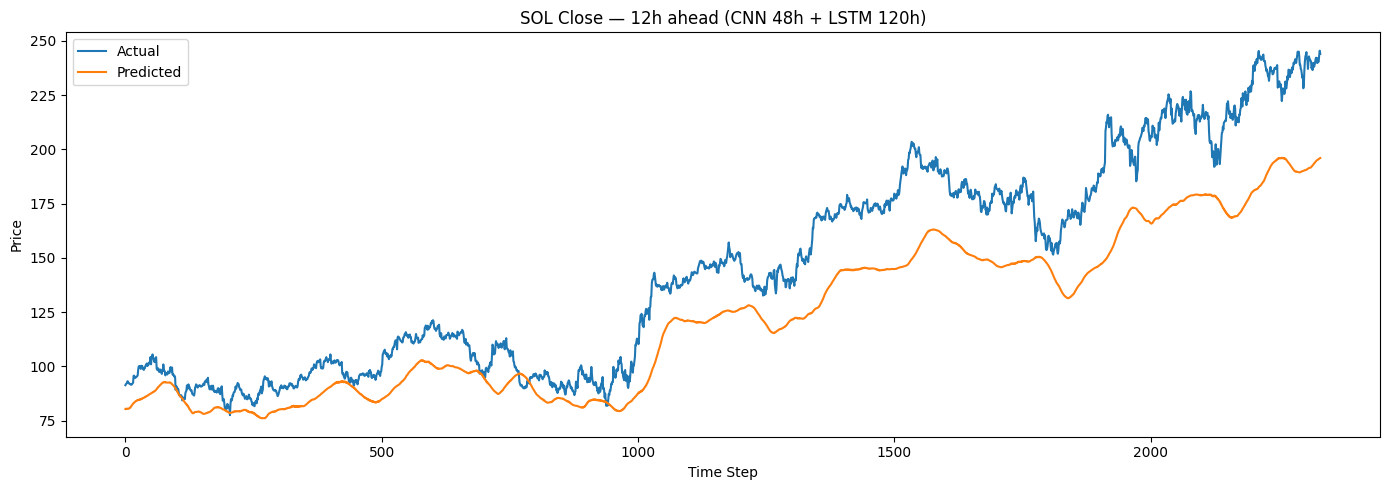

In [ ]:
# ============================
# Config
# ============================
SHORT_LOOKBACK = 48     # CNN branch
LONG_LOOKBACK  = 120    # LSTM branch
HORIZON        = 12     # hours ahead
TARGET_COL     = "SOL_Close"

# ============================
# Feature Lists
# ============================
selected_features = [
    # SOL
    'SOL_Volume_Change','SOL_Volume_MA_3h','SOL_Volume_MA_24h','SOL_Volume_Ratio',
    'SOL_Volume_STD_24h','SOL_Volume_Trend_7d','SOL_Returns','SOL_Volatility_3h',
    'SOL_Volatility_24h','SOL_High_Low_Range','SOL_Range_STD_24h','SOL_Volatility_Trend_7d',
    'SOL_Returns_1h','SOL_Returns_24h','SOL_Cumulative_Return_3h','SOL_EMA_12','SOL_EMA_26',
    'SOL_MACD','SOL_Return_Trend_7d','Sentiment_Daily','Sentiment_5Day_Cumulative','Sentiment_1Day_Lagged',
    # BTC
    'BTC_Volume_Change','BTC_Volume_MA_3h','BTC_Volume_MA_24h','BTC_Volume_Ratio',
    'BTC_Volume_STD_24h','BTC_Volume_Trend_7d','BTC_Returns','BTC_Volatility_3h',
    'BTC_Volatility_24h','BTC_High_Low_Range','BTC_Range_STD_24h','BTC_Volatility_Trend_7d',
    'BTC_Returns_1h','BTC_Returns_24h','BTC_Cumulative_Return_3h','BTC_EMA_12','BTC_EMA_26',
    'BTC_MACD','BTC_Return_Trend_7d',
]
lag_features = [c for c in df.columns if '_lag' in c]



# Use ALL features for BOTH branches
all_features = selected_features + interaction_features + lag_features
assert len(all_features) > 0, "No features found."

# ============================
# Helpers
# ============================
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D, LSTM, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2

def make_sequences(X, y, lookback):
    """(X_seq, y_seq) with label aligned to end of each window."""
    Xs, ys = [], []
    n = len(X)
    for i in range(n - lookback + 1):
        Xs.append(X[i:i+lookback])
        ys.append(y[i+lookback-1])
    return np.asarray(Xs), np.asarray(ys)

def make_dual_sequences(X, y, short_lb, long_lb):
    """Return (X_short_aligned, X_long, y_long) aligned on long lookback timeline."""
    X_short, _      = make_sequences(X, y, short_lb)
    X_long,  y_long = make_sequences(X, y, long_lb)
    offset = long_lb - short_lb
    if offset < 0:
        raise ValueError("LONG_LOOKBACK must be >= SHORT_LOOKBACK.")
    X_short_aligned = X_short[offset:] if offset > 0 else X_short
    assert len(X_short_aligned) == len(X_long) == len(y_long), "Sequence alignment mismatch."
    return X_short_aligned, X_long, y_long

def trim_right(split_df, horizon):
    """Trim last HORIZON rows so shifted labels don't cross into next split."""
    return split_df.iloc[:-horizon] if len(split_df) > horizon else split_df.iloc[0:0]

# ============================
# Build modeling DataFrame
# ============================
df_model = df[all_features + [TARGET_COL]].copy()
df_model['target'] = df_model[TARGET_COL].shift(-HORIZON)
df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.dropna(inplace=True)

# ============================
# Chronological Split: 70/15/15 + HORIZON trim
# ============================
n = len(df_model)
train_end = int(0.70 * n)
val_end   = int(0.85 * n)

train_raw = df_model.iloc[:train_end]
val_raw   = df_model.iloc[train_end:val_end]
test_df   = df_model.iloc[val_end:]    # test can stay; NaNs from tail were dropped already

# ✂️ Prevent label leakage across split boundaries
train_df = trim_right(train_raw, HORIZON)
val_df   = trim_right(val_raw,   HORIZON)

# ============================
# Fit scalers on TRAIN only (NO LEAK)
# ============================
scaler_X = MinMaxScaler().fit(train_df[all_features])
scaler_y = MinMaxScaler().fit(train_df[['target']])

def transform(split):
    X = scaler_X.transform(split[all_features])
    y = scaler_y.transform(split[['target']])
    return X, y

X_tr, y_tr = transform(train_df)
X_va, y_va = transform(val_df)
X_te, y_te = transform(test_df)

# ============================
# Sequences for BOTH branches (after split & scaling) with alignment
# ============================
Xshort_tr, Xlong_tr, y_tr_seq = make_dual_sequences(X_tr, y_tr, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_va, Xlong_va, y_va_seq = make_dual_sequences(X_va, y_va, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_te, Xlong_te, y_te_seq = make_dual_sequences(X_te, y_te, SHORT_LOOKBACK, LONG_LOOKBACK)

# ============================
# Model: CNN(48h) + LSTM(120h) -> concat -> Dense(1)
# ============================
n_features = Xlong_tr.shape[2]

# Short-term CNN branch (48h)
inp_short = Input(shape=(SHORT_LOOKBACK, n_features), name="short_input")
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(inp_short)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = MaxPooling1D(2)(s)
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(s)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = GlobalAveragePooling1D()(s)

# Long-term LSTM branch (120h)
inp_long = Input(shape=(LONG_LOOKBACK, n_features), name="long_input")
l = LSTM(120, kernel_regularizer=l2(1e-4), return_sequences=False)(inp_long)
l = Dropout(0.2)(l)

# Merge & head
x = Concatenate()([s, l])
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.2)(x)
out = Dense(1, name='regression')(x)

model = Model(inputs=[inp_short, inp_long], outputs=out)
model.compile(optimizer=Adam(1e-3), loss=Huber(), metrics=['mae'])

# ============================
# Train (VALIDATION only)
# ============================
es = EarlyStopping(monitor='val_loss', mode='min', patience=6, restore_best_weights=True)
history = model.fit(
    [Xshort_tr, Xlong_tr], y_tr_seq,
    validation_data=([Xshort_va, Xlong_va], y_va_seq),
    epochs=40, batch_size=128, callbacks=[es], verbose=1
)

# ============================
# Test metrics & plot (first and only time we touch test)
# ============================
y_pred_scaled = model.predict([Xshort_te, Xlong_te])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_te_seq)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f"Test MSE: {mse:.4f} | Test MAE: {mae:.4f}")

plt.figure(figsize=(14,5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'SOL Close — {HORIZON}h ahead (CNN 48h + LSTM 120h)')
plt.xlabel('Time Step'); plt.ylabel('Price')
plt.legend(); plt.tight_layout(); plt.show()


Epoch 1/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 32s 311ms/step - loss: 0.0969 - mae: 0.2360 - val_loss: 0.8786 - val_mae: 1.2973
Epoch 2/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - loss: 0.0353 - mae: 0.0798 - val_loss: 0.7624 - val_mae: 1.1720
Epoch 3/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - loss: 0.0298 - mae: 0.0673 - val_loss: 0.5515 - val_mae: 0.9268
Epoch 4/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 276ms/step - loss: 0.0262 - mae: 0.0610 - val_loss: 0.4152 - val_mae: 0.7706
Epoch 5/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - loss: 0.0237 - mae: 0.0582 - val_loss: 0.2807 - val_mae: 0.6007
Epoch 6/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - loss: 0.0214 - mae: 0.0532 - val_loss: 0.1228 - val_mae: 0.3851
Epoch 7/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0195 - mae: 0.0508 - val_loss: 0.1403 - val_mae: 0.4194
Epoch 8/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0178 - mae: 0.0475 - val_loss: 0.2447 - val_mae: 0.5717
Epoch 9/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/

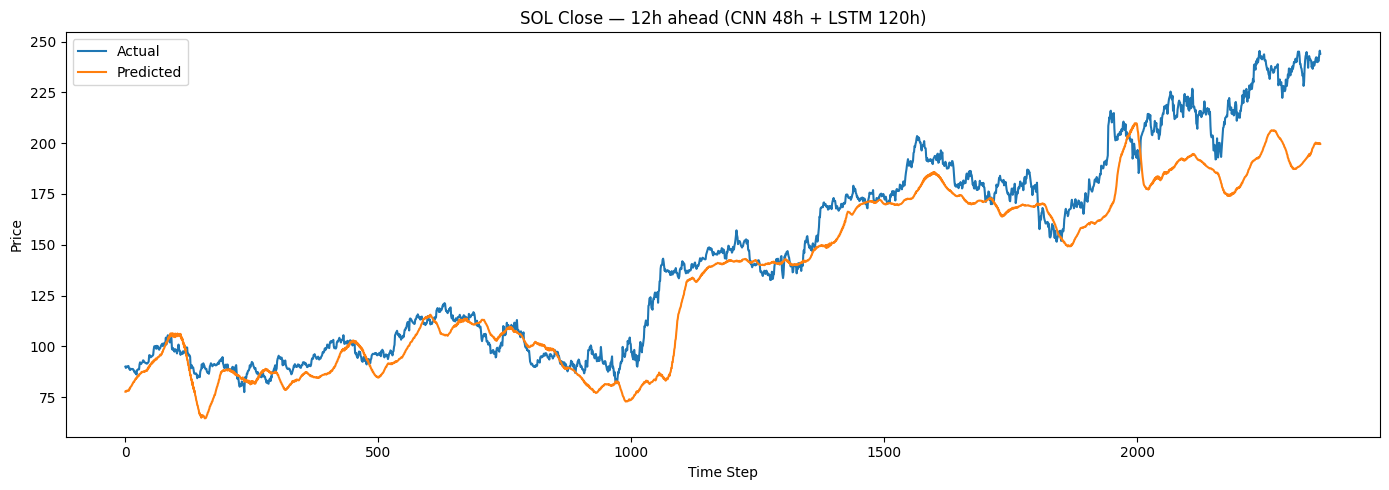

In [ ]:
# ============================
# Config
# ============================
SHORT_LOOKBACK = 48     # CNN branch
LONG_LOOKBACK  = 96    # LSTM branch
HORIZON        = 12     # hours ahead
TARGET_COL     = "SOL_Close"

# ============================
# Feature Lists
# ============================

lag_features = [c for c in df.columns if '_lag' in c]



# Use ALL features for BOTH branches
all_features =  interaction_features + selected_features
assert len(all_features) > 0, "No features found."

# ============================
# Helpers
# ============================
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D, LSTM, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2

def make_sequences(X, y, lookback):
    """(X_seq, y_seq) with label aligned to end of each window."""
    Xs, ys = [], []
    n = len(X)
    for i in range(n - lookback + 1):
        Xs.append(X[i:i+lookback])
        ys.append(y[i+lookback-1])
    return np.asarray(Xs), np.asarray(ys)

def make_dual_sequences(X, y, short_lb, long_lb):
    """Return (X_short_aligned, X_long, y_long) aligned on long lookback timeline."""
    X_short, _      = make_sequences(X, y, short_lb)
    X_long,  y_long = make_sequences(X, y, long_lb)
    offset = long_lb - short_lb
    if offset < 0:
        raise ValueError("LONG_LOOKBACK must be >= SHORT_LOOKBACK.")
    X_short_aligned = X_short[offset:] if offset > 0 else X_short
    assert len(X_short_aligned) == len(X_long) == len(y_long), "Sequence alignment mismatch."
    return X_short_aligned, X_long, y_long

def trim_right(split_df, horizon):
    """Trim last HORIZON rows so shifted labels don't cross into next split."""
    return split_df.iloc[:-horizon] if len(split_df) > horizon else split_df.iloc[0:0]

# ============================
# Build modeling DataFrame
# ============================
df_model = df[all_features + [TARGET_COL]].copy()
df_model['target'] = df_model[TARGET_COL].shift(-HORIZON)
df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.dropna(inplace=True)

# ============================
# Chronological Split: 70/15/15 + HORIZON trim
# ============================
n = len(df_model)
train_end = int(0.70 * n)
val_end   = int(0.85 * n)

train_raw = df_model.iloc[:train_end]
val_raw   = df_model.iloc[train_end:val_end]
test_df   = df_model.iloc[val_end:]    # test can stay; NaNs from tail were dropped already

# ✂️ Prevent label leakage across split boundaries
train_df = trim_right(train_raw, HORIZON)
val_df   = trim_right(val_raw,   HORIZON)

# ============================
# Fit scalers on TRAIN only (NO LEAK)
# ============================
scaler_X = MinMaxScaler().fit(train_df[all_features])
scaler_y = MinMaxScaler().fit(train_df[['target']])

def transform(split):
    X = scaler_X.transform(split[all_features])
    y = scaler_y.transform(split[['target']])
    return X, y

X_tr, y_tr = transform(train_df)
X_va, y_va = transform(val_df)
X_te, y_te = transform(test_df)

# ============================
# Sequences for BOTH branches (after split & scaling) with alignment
# ============================
Xshort_tr, Xlong_tr, y_tr_seq = make_dual_sequences(X_tr, y_tr, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_va, Xlong_va, y_va_seq = make_dual_sequences(X_va, y_va, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_te, Xlong_te, y_te_seq = make_dual_sequences(X_te, y_te, SHORT_LOOKBACK, LONG_LOOKBACK)

# ============================
# Model: CNN(48h) + LSTM(120h) -> concat -> Dense(1)
# ============================
n_features = Xlong_tr.shape[2]

# Short-term CNN branch (48h)
inp_short = Input(shape=(SHORT_LOOKBACK, n_features), name="short_input")
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(inp_short)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = MaxPooling1D(2)(s)
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(s)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = GlobalAveragePooling1D()(s)

# Long-term LSTM branch (120h)
inp_long = Input(shape=(LONG_LOOKBACK, n_features), name="long_input")
l = LSTM(120, kernel_regularizer=l2(1e-4), return_sequences=False)(inp_long)
l = Dropout(0.2)(l)

# Merge & head
x = Concatenate()([s, l])
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.2)(x)
out = Dense(1, name='regression')(x)

model = Model(inputs=[inp_short, inp_long], outputs=out)
model.compile(optimizer=Adam(1e-3), loss=Huber(), metrics=['mae'])

# ============================
# Train (VALIDATION only)
# ============================
es = EarlyStopping(monitor='val_loss', mode='min', patience=6, restore_best_weights=True)
history = model.fit(
    [Xshort_tr, Xlong_tr], y_tr_seq,
    validation_data=([Xshort_va, Xlong_va], y_va_seq),
    epochs=40, batch_size=128, callbacks=[es], verbose=1
)

# ============================
# Test metrics & plot (first and only time we touch test)
# ============================
y_pred_scaled = model.predict([Xshort_te, Xlong_te])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_te_seq)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f"Test MSE: {mse:.4f} | Test MAE: {mae:.4f}")

plt.figure(figsize=(14,5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'SOL Close — {HORIZON}h ahead (CNN 48h + LSTM 120h)')
plt.xlabel('Time Step'); plt.ylabel('Price')
plt.legend(); plt.tight_layout(); plt.show()


Epoch 1/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - loss: 0.0713 - mae: 0.1845 - val_loss: 0.8988 - val_mae: 1.3232
Epoch 2/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 281ms/step - loss: 0.0321 - mae: 0.0712 - val_loss: 0.7756 - val_mae: 1.1920
Epoch 3/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 287ms/step - loss: 0.0262 - mae: 0.0589 - val_loss: 0.5812 - val_mae: 0.9717
Epoch 4/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 276ms/step - loss: 0.0226 - mae: 0.0526 - val_loss: 0.3713 - val_mae: 0.7462
Epoch 5/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - loss: 0.0199 - mae: 0.0493 - val_loss: 0.1964 - val_mae: 0.5304
Epoch 6/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 275ms/step - loss: 0.0176 - mae: 0.0465 - val_loss: 0.0422 - val_mae: 0.1862
Epoch 7/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 275ms/step - loss: 0.0157 - mae: 0.0434 - val_loss: 0.0199 - val_mae: 0.0866
Epoch 8/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 275ms/step - loss: 0.0141 - mae: 0.0431 - val_loss: 0.0180 - val_mae: 0.0855
Epoch 9/40
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 274ms/

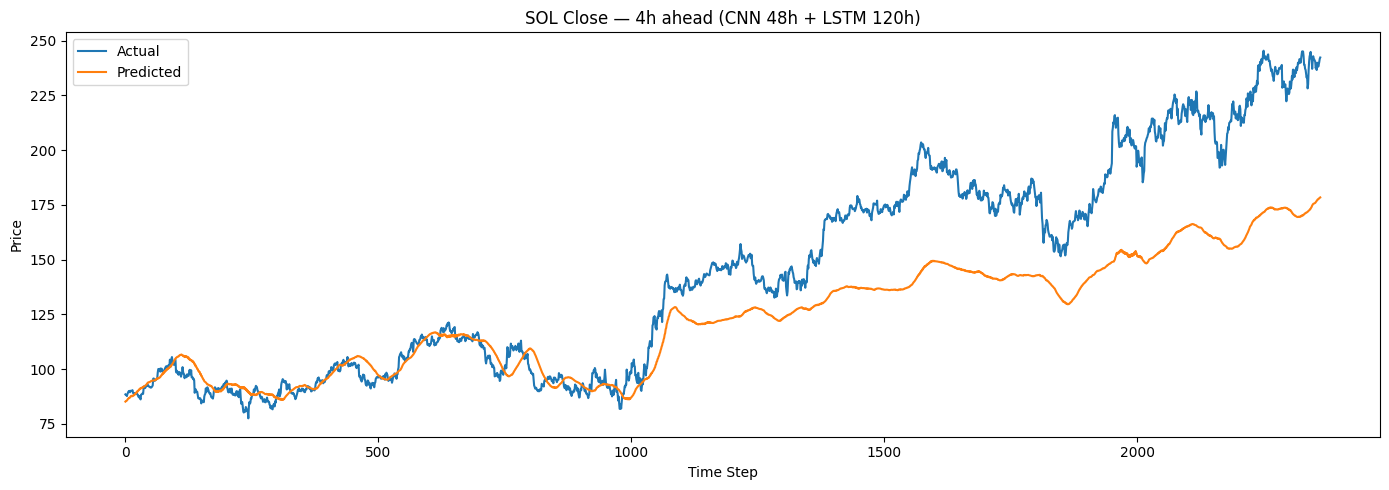

In [ ]:
# ============================
# Config
# ============================
SHORT_LOOKBACK = 48     # CNN branch
LONG_LOOKBACK  = 96    # LSTM branch
HORIZON        = 4     # hours ahead
TARGET_COL     = "SOL_Close"

# ============================
# Feature Lists
# ============================

lag_features = [c for c in df.columns if '_lag' in c]



# Use ALL features for BOTH branches
all_features =  interaction_features + selected_features
assert len(all_features) > 0, "No features found."

# ============================
# Helpers
# ============================
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D, LSTM, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2

def make_sequences(X, y, lookback):
    """(X_seq, y_seq) with label aligned to end of each window."""
    Xs, ys = [], []
    n = len(X)
    for i in range(n - lookback + 1):
        Xs.append(X[i:i+lookback])
        ys.append(y[i+lookback-1])
    return np.asarray(Xs), np.asarray(ys)

def make_dual_sequences(X, y, short_lb, long_lb):
    """Return (X_short_aligned, X_long, y_long) aligned on long lookback timeline."""
    X_short, _      = make_sequences(X, y, short_lb)
    X_long,  y_long = make_sequences(X, y, long_lb)
    offset = long_lb - short_lb
    if offset < 0:
        raise ValueError("LONG_LOOKBACK must be >= SHORT_LOOKBACK.")
    X_short_aligned = X_short[offset:] if offset > 0 else X_short
    assert len(X_short_aligned) == len(X_long) == len(y_long), "Sequence alignment mismatch."
    return X_short_aligned, X_long, y_long

def trim_right(split_df, horizon):
    """Trim last HORIZON rows so shifted labels don't cross into next split."""
    return split_df.iloc[:-horizon] if len(split_df) > horizon else split_df.iloc[0:0]

# ============================
# Build modeling DataFrame
# ============================
df_model = df[all_features + [TARGET_COL]].copy()
df_model['target'] = df_model[TARGET_COL].shift(-HORIZON)
df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.dropna(inplace=True)

# ============================
# Chronological Split: 70/15/15 + HORIZON trim
# ============================
n = len(df_model)
train_end = int(0.70 * n)
val_end   = int(0.85 * n)

train_raw = df_model.iloc[:train_end]
val_raw   = df_model.iloc[train_end:val_end]
test_df   = df_model.iloc[val_end:]    # test can stay; NaNs from tail were dropped already

# ✂️ Prevent label leakage across split boundaries
train_df = trim_right(train_raw, HORIZON)
val_df   = trim_right(val_raw,   HORIZON)

# ============================
# Fit scalers on TRAIN only (NO LEAK)
# ============================
scaler_X = MinMaxScaler().fit(train_df[all_features])
scaler_y = MinMaxScaler().fit(train_df[['target']])

def transform(split):
    X = scaler_X.transform(split[all_features])
    y = scaler_y.transform(split[['target']])
    return X, y

X_tr, y_tr = transform(train_df)
X_va, y_va = transform(val_df)
X_te, y_te = transform(test_df)

# ============================
# Sequences for BOTH branches (after split & scaling) with alignment
# ============================
Xshort_tr, Xlong_tr, y_tr_seq = make_dual_sequences(X_tr, y_tr, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_va, Xlong_va, y_va_seq = make_dual_sequences(X_va, y_va, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_te, Xlong_te, y_te_seq = make_dual_sequences(X_te, y_te, SHORT_LOOKBACK, LONG_LOOKBACK)

# ============================
# Model: CNN(48h) + LSTM(120h) -> concat -> Dense(1)
# ============================
n_features = Xlong_tr.shape[2]

# Short-term CNN branch (48h)
inp_short = Input(shape=(SHORT_LOOKBACK, n_features), name="short_input")
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(inp_short)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = MaxPooling1D(2)(s)
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(s)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = GlobalAveragePooling1D()(s)

# Long-term LSTM branch (120h)
inp_long = Input(shape=(LONG_LOOKBACK, n_features), name="long_input")
l = LSTM(120, kernel_regularizer=l2(1e-4), return_sequences=False)(inp_long)
l = Dropout(0.2)(l)

# Merge & head
x = Concatenate()([s, l])
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.2)(x)
out = Dense(1, name='regression')(x)

model = Model(inputs=[inp_short, inp_long], outputs=out)
model.compile(optimizer=Adam(1e-3), loss=Huber(), metrics=['mae'])

# ============================
# Train (VALIDATION only)
# ============================
es = EarlyStopping(monitor='val_loss', mode='min', patience=6, restore_best_weights=True)
history = model.fit(
    [Xshort_tr, Xlong_tr], y_tr_seq,
    validation_data=([Xshort_va, Xlong_va], y_va_seq),
    epochs=40, batch_size=128, callbacks=[es], verbose=1
)

# ============================
# Test metrics & plot (first and only time we touch test)
# ============================
y_pred_scaled = model.predict([Xshort_te, Xlong_te])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_te_seq)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f"Test MSE: {mse:.4f} | Test MAE: {mae:.4f}")

plt.figure(figsize=(14,5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'SOL Close — {HORIZON}h ahead (CNN 48h + LSTM 120h)')
plt.xlabel('Time Step'); plt.ylabel('Price')
plt.legend(); plt.tight_layout(); plt.show()


Epoch 1/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - loss: 0.1194 - mae: 0.2878 - val_loss: 0.8728 - val_mae: 1.2948
Epoch 2/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - loss: 0.0368 - mae: 0.0891 - val_loss: 0.6311 - val_mae: 1.0200
Epoch 3/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - loss: 0.0314 - mae: 0.0770 - val_loss: 0.5349 - val_mae: 0.9323
Epoch 4/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - loss: 0.0272 - mae: 0.0618 - val_loss: 0.1917 - val_mae: 0.5265
Epoch 5/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - loss: 0.0249 - mae: 0.0631 - val_loss: 0.0451 - val_mae: 0.1818
Epoch 6/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - loss: 0.0232 - mae: 0.0643 - val_loss: 0.0877 - val_mae: 0.3052
Epoch 7/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - loss: 0.0206 - mae: 0.0524 - val_loss: 0.0515 - val_mae: 0.2212
Epoch 8/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - loss: 0.0190 - mae: 0.0509 - val_loss: 0.0590 - val_mae: 0.2254
Epoch 9/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/

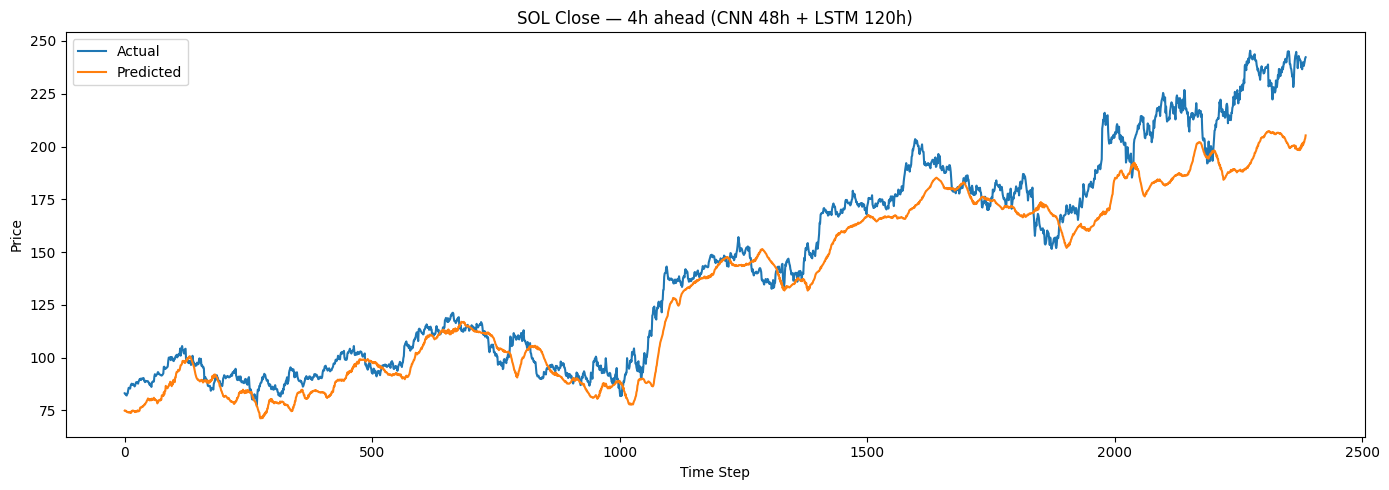

In [ ]:
# ============================
# Config
# ============================
SHORT_LOOKBACK = 24     # CNN branch
LONG_LOOKBACK  = 72   # LSTM branch
HORIZON        = 4     # hours ahead
TARGET_COL     = "SOL_Close"

# ============================
# Feature Lists
# ============================

lag_features = [c for c in df.columns if '_lag' in c]



# Use ALL features for BOTH branches
all_features =  interaction_features + selected_features
assert len(all_features) > 0, "No features found."

# ============================
# Helpers
# ============================
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D, LSTM, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2

def make_sequences(X, y, lookback):
    """(X_seq, y_seq) with label aligned to end of each window."""
    Xs, ys = [], []
    n = len(X)
    for i in range(n - lookback + 1):
        Xs.append(X[i:i+lookback])
        ys.append(y[i+lookback-1])
    return np.asarray(Xs), np.asarray(ys)

def make_dual_sequences(X, y, short_lb, long_lb):
    """Return (X_short_aligned, X_long, y_long) aligned on long lookback timeline."""
    X_short, _      = make_sequences(X, y, short_lb)
    X_long,  y_long = make_sequences(X, y, long_lb)
    offset = long_lb - short_lb
    if offset < 0:
        raise ValueError("LONG_LOOKBACK must be >= SHORT_LOOKBACK.")
    X_short_aligned = X_short[offset:] if offset > 0 else X_short
    assert len(X_short_aligned) == len(X_long) == len(y_long), "Sequence alignment mismatch."
    return X_short_aligned, X_long, y_long

def trim_right(split_df, horizon):
    """Trim last HORIZON rows so shifted labels don't cross into next split."""
    return split_df.iloc[:-horizon] if len(split_df) > horizon else split_df.iloc[0:0]

# ============================
# Build modeling DataFrame
# ============================
df_model = df[all_features + [TARGET_COL]].copy()
df_model['target'] = df_model[TARGET_COL].shift(-HORIZON)
df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.dropna(inplace=True)

# ============================
# Chronological Split: 70/15/15 + HORIZON trim
# ============================
n = len(df_model)
train_end = int(0.70 * n)
val_end   = int(0.85 * n)

train_raw = df_model.iloc[:train_end]
val_raw   = df_model.iloc[train_end:val_end]
test_df   = df_model.iloc[val_end:]    # test can stay; NaNs from tail were dropped already

# ✂️ Prevent label leakage across split boundaries
train_df = trim_right(train_raw, HORIZON)
val_df   = trim_right(val_raw,   HORIZON)

# ============================
# Fit scalers on TRAIN only (NO LEAK)
# ============================
scaler_X = MinMaxScaler().fit(train_df[all_features])
scaler_y = MinMaxScaler().fit(train_df[['target']])

def transform(split):
    X = scaler_X.transform(split[all_features])
    y = scaler_y.transform(split[['target']])
    return X, y

X_tr, y_tr = transform(train_df)
X_va, y_va = transform(val_df)
X_te, y_te = transform(test_df)

# ============================
# Sequences for BOTH branches (after split & scaling) with alignment
# ============================
Xshort_tr, Xlong_tr, y_tr_seq = make_dual_sequences(X_tr, y_tr, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_va, Xlong_va, y_va_seq = make_dual_sequences(X_va, y_va, SHORT_LOOKBACK, LONG_LOOKBACK)
Xshort_te, Xlong_te, y_te_seq = make_dual_sequences(X_te, y_te, SHORT_LOOKBACK, LONG_LOOKBACK)

# ============================
# Model: CNN(48h) + LSTM(120h) -> concat -> Dense(1)
# ============================
n_features = Xlong_tr.shape[2]

# Short-term CNN branch (48h)
inp_short = Input(shape=(SHORT_LOOKBACK, n_features), name="short_input")
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(inp_short)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = MaxPooling1D(2)(s)
s = Conv1D(64, 3, activation='relu', padding='valid', kernel_regularizer=l2(1e-4))(s)
s = BatchNormalization()(s)
s = Dropout(0.2)(s)
s = GlobalAveragePooling1D()(s)

# Long-term LSTM branch (120h)
inp_long = Input(shape=(LONG_LOOKBACK, n_features), name="long_input")
l = LSTM(120, kernel_regularizer=l2(1e-4), return_sequences=False)(inp_long)
l = Dropout(0.2)(l)

# Merge & head
x = Concatenate()([s, l])
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.2)(x)
out = Dense(1, name='regression')(x)

model = Model(inputs=[inp_short, inp_long], outputs=out)
model.compile(optimizer=Adam(1e-3), loss=Huber(), metrics=['mae'])

# ============================
# Train (VALIDATION only)
# ============================
es = EarlyStopping(monitor='val_loss', mode='min', patience=6, restore_best_weights=True)
history = model.fit(
    [Xshort_tr, Xlong_tr], y_tr_seq,
    validation_data=([Xshort_va, Xlong_va], y_va_seq),
    epochs=40, batch_size=128, callbacks=[es], verbose=1
)

# ============================
# Test metrics & plot (first and only time we touch test)
# ============================
y_pred_scaled = model.predict([Xshort_te, Xlong_te])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_te_seq)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f"Test MSE: {mse:.4f} | Test MAE: {mae:.4f}")

plt.figure(figsize=(14,5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'SOL Close — {HORIZON}h ahead (CNN 48h + LSTM 120h)')
plt.xlabel('Time Step'); plt.ylabel('Price')
plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.4 MB/s eta 0:00:00
